<h1 style="text-align: center;" markdown="1">TP2: Primer KNN eliminando filas con columnas nulas y regresion</h1>
![](../data/icon_properati-data.png)

In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

# modules
import knn as knnlibrary

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
properties =knnlibrary.get_dataset()
properties.head()

,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,...,price_aprox_usd,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,title
0,Argentina,2016-06-01,USD,UNIDAD AL FRENTE CON BALCON CORRIDO Y 2 COCHER...,NaN,5.0,3430234.0,ecc59daba3d5bc726ae8aa9dbccfe79635aef175,https://thumbs4.properati.com/2/RbSA4pJRsv2S8M...,-34.588856,...,450000.0,3461.538462,NaN,http://www.properati.com.ar/ys05_venta_departa...,apartment,4.0,Capital Federal,130.0,NaN,IMPECABLE PISO DE 4 AMB + DEP Y 2 COCHERAS
1,Argentina,2016-06-01,USD,SE VENDE A ESTRENAR EN PLENO CORAZON DE ONCE !...,NaN,1.0,3430291.0,7f1423f29df530cae38e7a59ddc6430c7da7ca38,https://thumbs4.properati.com/8/IMCZ4CqITeOqx5...,-34.603400,...,95000.0,2065.217391,NaN,http://www.properati.com.ar/ys06_venta_departa...,apartment,1.0,Capital Federal,46.0,NaN,Excelentes oficinas a estrenar!!!!!
2,Argentina,2016-06-01,USD,Local en Venta sobre Avenida Santa Fe.Ideal pa...,500,NaN,3436109.0,4fdd84d998a3f82f4a3b36f405cc3f7013fb642e,https://thumbs4.properati.com/9/-VNE04tbyVFfcO...,-34.595849,...,52000.0,NaN,NaN,http://www.properati.com.ar/ys0r_venta_local_b...,store,NaN,Capital Federal,0.0,NaN,Local sobre Av. Santa Fe
3,Argentina,2016-06-01,USD,CHALET INMEJORABLE UBICACIÓN: PLANTA BAJA: AMP...,NaN,NaN,NaN,a786b4d9a8f6cc86ba3e839f4cb85bbb03cf15fd,https://thumbs4.properati.com/5/FhMeTqvYjAiHVS...,-34.796679,...,360000.0,NaN,1285.714286,http://www.properati.com.ar/ys10_venta_casa_ad...,house,6.0,Bs.As. G.B.A. Zona Sur,0.0,280.0,IMPORTANTE CHALET ZONA MUY RESIDENCIAL
4,Argentina,2016-06-01,USD,"Casa muy funcional, desarrollada en una sola p...",NaN,NaN,3429979.0,9844244d17eb024e0632a63b4098b67889de06bc,https://thumbs4.properati.com/2/dxU45Z8wqh3Mdq...,NaN,...,150000.0,1250.000000,1250.000000,http://www.properati.com.ar/ys1c_venta_casa_pi...,house,4.0,Bs.As. G.B.A. Zona Norte,120.0,120.0,BAYUGAR PROPIEDADES/ LINDISIMA CASA/ BARRIO CA...


In [3]:
# transformo el campo fecha
properties_caba = knnlibrary.transform_date(properties)

properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456866 entries, 0 to 80257
Data columns (total 30 columns):
country_name                  456866 non-null object
created_on                    456866 non-null object
currency                      386939 non-null object
description                   456847 non-null object
expenses                      45970 non-null object
floor                         47408 non-null float64
geonames_id                   373284 non-null float64
id                            456866 non-null object
image_thumbnail               435112 non-null object
lat                           332561 non-null float64
lat-lon                       332561 non-null object
lon                           332561 non-null float64
operation                     456866 non-null object
place_name                    456801 non-null object
place_with_parent_names       456866 non-null object
price                         400975 non-null float64
price_aprox_local_currency    400975 no

In [4]:
# filtro por CABA y GBA
# queremos solo las propiedades que tienen precio y eliminamos columnas que sabemos que no son 
#redundantes y que no nos servirian para knn
# eliminamos propiedades con mas de 54 pisos
properties_caba = knnlibrary.clean_dataset(properties)

# las expensas tienen demasiados nulos por lo que voy a eliminar esa columna
properties_caba = properties_caba.drop(['expenses'], axis = 1)

properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36021 entries, 0 to 80130
Data columns (total 15 columns):
currency                   35538 non-null object
floor                      36021 non-null float64
lat                        26803 non-null float64
lon                        26803 non-null float64
place_name                 36021 non-null object
place_with_parent_names    36021 non-null object
price                      36021 non-null float64
property_type              36021 non-null object
rooms                      20263 non-null float64
state_name                 36021 non-null object
surface_covered_in_m2      34147 non-null float64
surface_total_in_m2        24789 non-null float64
created_on_year            36021 non-null int64
created_on_month           36021 non-null int64
created_on_day             36021 non-null int64
dtypes: float64(7), int64(3), object(5)
memory usage: 4.4+ MB


In [5]:
# eliminamos filas con valores nulo
properties_caba = properties_caba.dropna(how='any')
properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9380 entries, 385 to 80073
Data columns (total 15 columns):
currency                   9380 non-null object
floor                      9380 non-null float64
lat                        9380 non-null float64
lon                        9380 non-null float64
place_name                 9380 non-null object
place_with_parent_names    9380 non-null object
price                      9380 non-null float64
property_type              9380 non-null object
rooms                      9380 non-null float64
state_name                 9380 non-null object
surface_covered_in_m2      9380 non-null float64
surface_total_in_m2        9380 non-null float64
created_on_year            9380 non-null int64
created_on_month           9380 non-null int64
created_on_day             9380 non-null int64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.1+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder

# atributos categoricos
encoder = LabelEncoder()
properties_caba = knnlibrary.encoder_attributes(properties_caba, encoder)

properties_caba.head()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,currency,floor,lat,lon,place_name,place_with_parent_names,price,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,created_on_year,created_on_month,created_on_day
385,1,2.0,-34.544033,-58.472911,91,121,135000.0,1,3.0,3,74.0,74.0,2016,6,2
890,1,2.0,-34.648915,-58.796383,66,45,48000.0,1,2.0,1,32.0,32.0,2016,6,9
1010,1,10.0,-34.599574,-58.378334,23,93,129000.0,1,3.0,3,43.0,43.0,2016,6,10
1018,1,7.0,-34.651616,-58.623603,67,50,58000.0,1,1.0,1,27.0,29.0,2016,6,10
1025,1,2.0,-34.425266,-58.579019,104,26,100000.0,1,2.0,0,50.0,56.0,2016,6,10


# Separacion del set de train para Cross-validation, Normalizacion y feature selection

In [7]:
from sklearn.model_selection import train_test_split
import datetime

now = datetime.datetime.now()

# separamos el train de traing para validarlo luego usando un 30% de los datos
X, y = properties_caba.iloc[:, properties_caba.columns != 'price'].values, properties_caba.iloc[:, properties_caba.columns == 'price'].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=now.microsecond)
    
len(X_test), len(X_train)

(1876, 7504)

In [8]:
# a cada dato le restamos la media y lo dividimos por su desviacion standard
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# en la documentacion de sklearn menciona sobre la regularizacion pero la voy a escapear por ahora
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train_std, y_train)
print('Training accuracy:', logi_regr.score(X_train_std, y_train))
print('Test accuracy:', logi_regr.score(X_test_std, y_test))

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 0.0539712153518
Test accuracy: 0.044776119403


Aca vemos que hay algo extrano porque no hicimos ningun tipo de moficacion en los parametros

In [9]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, median_absolute_error

# clase para hacer Backward Selection
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
        X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train,
                        X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

# aplicamos algoritmos
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
sbs = SBS(knn, k_features=1, scoring=median_absolute_error)
sbs.fit(X_train_std, y_train)
#y_pred = knn.fit(X_train_std, y_train).predict(X_test_std)
#median_absolute_error(y_test, y_pred)

In [10]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
 (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
 (0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13),
 (0, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13),
 (0, 2, 3, 4, 5, 6, 8, 11, 12, 13),
 (0, 3, 4, 5, 6, 8, 11, 12, 13),
 (0, 4, 5, 6, 8, 11, 12, 13),
 (0, 4, 5, 6, 8, 11, 12),
 (0, 4, 5, 6, 8, 11),
 (4, 5, 6, 8, 11),
 (4, 5, 6, 11),
 (4, 6, 11),
 (6, 11),
 (11,)]

In [11]:
sbs.scores_

[2650.1023215144378,
 4285.1901519912135,
 4500.0,
 5880.4000000000015,
 9908.3804622956959,
 10999.800000000003,
 19873.840898074704,
 26000.000000000007,
 32100.0,
 40450.0,
 40300.0,
 38996.0,
 54170.0,
 40922.600000000006]

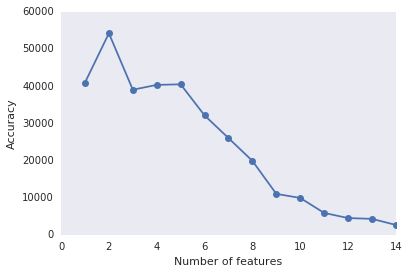

In [12]:
# graficamos
k_feat = [len(k) for k in sbs.subsets_]
plot(k_feat, sbs.scores_, marker='o')
#ylim([0.0, 1.1])
ylabel('Accuracy')
xlabel('Number of features')
grid()
show()

In [13]:
# hacemos una prueba en el set original
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.999623535627
Test accuracy: 0.964413645729


In [14]:
k_param = list(sbs.subsets_[0])
print(properties_caba.iloc[:, properties_caba.columns != 'price'].columns[k_param])

# y como clasifica tomando solo los features devueltos
knn.fit(X_train_std[:, k_param], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k_param], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k_param], y_test))

Index(['currency', 'floor', 'lat', 'lon', 'place_name',
       'place_with_parent_names', 'property_type', 'rooms', 'state_name',
       'surface_covered_in_m2', 'surface_total_in_m2', 'created_on_year',
       'created_on_month', 'created_on_day'],
      dtype='object')
Training accuracy: 0.999623535627
Test accuracy: 0.964413645729


Creo que luego de varias corridas el mejor resultado se da cuando seleccionamos todos los features. Por lo que nos quedamos con este resultado.

# Seleccion de la cantidad optima de vecinos y la metrica a utilizar
Elegimos k usando grid search y luego p usando random search

In [15]:
k_scores = []
k_list = []
p_list = []
labels = []

best_score = 0
best_k = 0
best_p = 0

for i in range(2,10):
    for p in np.random.randint(2,10,size=4):
        knn = KNeighborsRegressor(n_neighbors=i, weights='distance', p=p)
        knn.fit(X_train_std[:, k_param], y_train)

        p_list.append(p)
        k_list.append(i)
        
        sc = knn.score(X_test_std[:, k_param], y_test)
        
        labels.append(str(round(sc,3)))
        k_scores.append(sc)
        
        if(sc > best_score):
            best_score = sc
            best_k = i
            best_p = p

mu = np.mean(k_scores)
v = np.var(k_scores)

k_scores = list(map(lambda x: ((x-mu)/v)*50, k_scores))

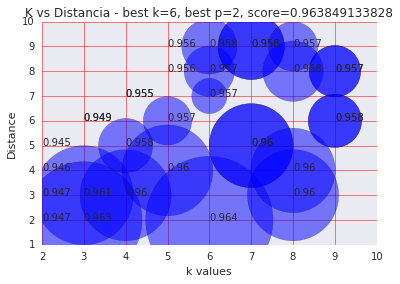

In [16]:
# graficamos
fig, ax = plt.subplots()
ax.scatter(k_list, p_list, s=k_scores, alpha=0.5)

title = "K vs Distancia - best k=%s, best p=%s, score=%s"%(best_k, best_p, best_score)
plt.title(title)
ylabel('Distance')
xlabel('k values')

for i, label in enumerate(labels):
    ax.annotate(label, (k_list[i],p_list[i]))

ax.grid(linestyle='-', linewidth='0.5', color='red')

plt.savefig('/home/jovyan/work/TP/TP2/img/best_k=%s-best_p=%s-score=%s.png'%(best_k, best_p, best_score));

### Corridas con p=2
Primera corrida: p=2 k=5
</br>Corridas posteriores: p=2, k entre 9 y 13

### Corridas modificando tanto p como k
<ul>
<li>p=46, k=3, score=0.93</li>
<li>p=57, k=3, score=0.933</li>
<li>p=4, k=2, score=0.905</li>
<li>p=82, k=4, score=0.89477</li>
<li>p=81, k=5, score=0.8630</li>
<li>p=2, k=6, score=0.9638</li>
</ul>

# Prediccion

In [17]:
# leemos set de test
test_df = pd.read_csv('../data/properati_dataset_testing_noprice.csv', low_memory=False)

# transformamos atributos categoricos
test_df['place_name'] = encoder.fit_transform(test_df[['place_name']])
test_df['state_name'] = encoder.fit_transform(test_df[['state_name']])
test_df['place_with_parent_names'] = encoder.fit_transform(test_df[['place_with_parent_names']])
test_df['property_type'] = encoder.fit_transform(test_df[['property_type']])

# tranformamos fechas
X_test_df = knnlibrary.transform_date(test_df)
X_test_df = X_test_df[['floor','lat','lon','place_name','place_with_parent_names','property_type','rooms','state_name','surface_covered_in_m2','surface_total_in_m2','created_on_year','created_on_month','created_on_day']].head()
X_test_df.head()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,floor,lat,lon,place_name,place_with_parent_names,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,created_on_year,created_on_month,created_on_day
0,NaN,-34.610988,-58.363464,152,219,1,NaN,4,NaN,0.0,2017,8,24
1,NaN,NaN,NaN,29,180,1,NaN,3,NaN,0.0,2017,8,25
2,NaN,-34.589363,-58.412880,136,210,1,NaN,4,48.0,53.0,2017,8,1
3,NaN,NaN,NaN,40,193,1,NaN,4,39.0,39.0,2017,8,1
4,NaN,NaN,NaN,40,193,1,NaN,4,51.0,51.0,2017,8,1


In [20]:
knn.predict(X_test_df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ValueError: could not convert string to float: 'Venta de Chalet 4 AMBIENTES en CIRCUNSCRIPCIÓN 3°, CIUDAD EVITA.Chalet en esquina refaccionado. Living con estar y comedor agregado, piso de cerámico; cocina con comedor diario, muebles de cocina en madera y piso cerámico: tres dormitorios ( 2 con placard) con pisos cerámicos; cochera semicubierta para un auto con piso de laja; quincho con techo de tejas, parrilla, instalación de gas y lavadero.Parque libre con piscina de 2.5 X 5 con caldera Lote: 367 m2          Superficie Cubierta: 130 m2VILA Propiedades. -  - VILA PROPIEDADES'

In [ ]:
# ejecutamos knn
knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p)
knn.fit(X_train_std[:, k_param], y_train)